# Problem Statement : 

# Given above data build a machine learning model that can classify Loan applicant’s Risk segmentation

In [38]:
import pandas as pd # for data frame
import numpy as np # for mathemetical operation
import matplotlib.pyplot as plt # for vizualization
%matplotlib inline
import seaborn as sns #for visualization
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading dataset

df = pd.read_excel("risk_loan.xlsx")
df.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


In [4]:
df.shape

(8995, 7)

In [5]:
df_col = list(df.columns)
df_col

['Age',
 'Total Work Experience',
 'Number of years in city',
 'Cost to Request Ratio',
 'Cibil score',
 'Overdrafts past12months',
 'Total bounces past12months']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


In [7]:
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


In [8]:
df.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Total Work Experience'>

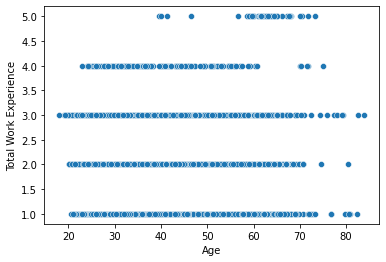

In [9]:
sns.scatterplot(x=df["Age"],y=df["Total Work Experience"])

<AxesSubplot:xlabel='Age'>

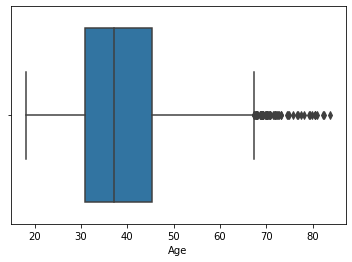

In [10]:
#box plot for Age
sns.boxplot(df.Age)

<AxesSubplot:xlabel='Cibil score'>

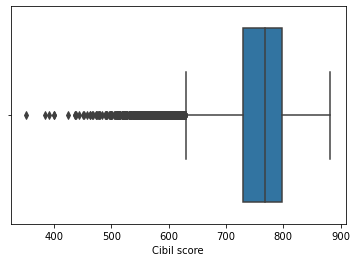

In [12]:
#boxplot for cibil score
sns.boxplot(df["Cibil score"])

In [13]:
#split data into feature data and target data
X = df.drop("Total bounces past12months",axis=1)
y = df["Total bounces past12months"]

In [14]:
#feature data
X.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months
0,40.50,2,6,0.842666,594,0
1,41.25,5,2,0.791667,754,0
2,39.50,5,2,0.727273,779,0
3,35.00,1,4,0.820232,818,0
4,34.00,3,3,0.455581,853,0


In [15]:
#target data
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Total bounces past12months, dtype: int64

In [16]:
#split train and test data for building model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [33]:
X_train.shape

(7196, 6)

In [34]:
y_test.shape

(1799,)

In [19]:
#classify the model
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [21]:
#score on train data
model.score(X_train,y_train)

0.6820455808782657

In [20]:
#score on test data
model.score(X_test,y_test)

0.6292384658143413

In [28]:
#predicted class on test data
y_pred = model.predict(X_test)

In [29]:
#accuracy on test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6453585325180656

In [22]:
#for loop for KNN with 1 to 14 Neighbors  
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    model = KNeighborsClassifier(i)
    model.fit(X_train,y_train)
    
    train_scores.append(model.score(X_train,y_train))
    test_scores.append(model.score(X_test,y_test))

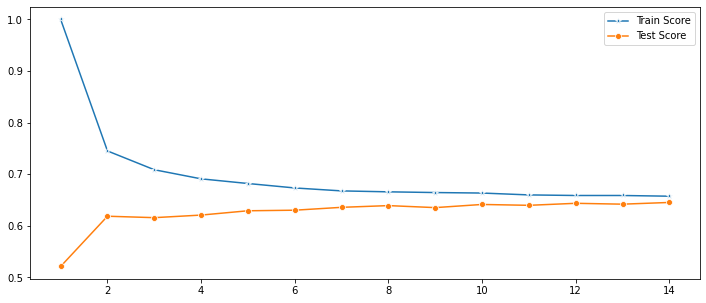

In [23]:
#train and test score for 14 models
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [24]:
#Setup a knn classifier with 14 neighbors
model14 = KNeighborsClassifier(14)
model14.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [25]:
#score on train data
model.score(X_train,y_train)

0.6574485825458588

In [26]:
#score on test data
model.score(X_test,y_test)

0.6453585325180656

In [30]:
#predicted class on test data
y_pred = model.predict(X_test)

In [31]:
#accuracy score on test data
accuracy_score(y_test,y_pred)

0.6453585325180656

Text(69.0, 0.5, 'Actual')

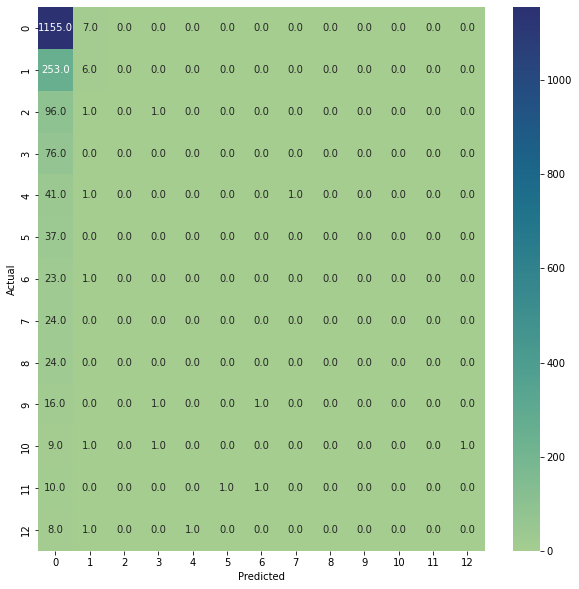

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt=".1f",cmap="crest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,digits=5))

              precision    recall  f1-score   support

           0    0.65181   0.99398   0.78732      1162
           1    0.33333   0.02317   0.04332       259
           2    0.00000   0.00000   0.00000        98
           3    0.00000   0.00000   0.00000        76
           4    0.00000   0.00000   0.00000        43
           5    0.00000   0.00000   0.00000        37
           6    0.00000   0.00000   0.00000        24
           7    0.00000   0.00000   0.00000        24
           8    0.00000   0.00000   0.00000        24
           9    0.00000   0.00000   0.00000        18
          10    0.00000   0.00000   0.00000        12
          11    0.00000   0.00000   0.00000        12
          12    0.00000   0.00000   0.00000        10

    accuracy                        0.64536      1799
   macro avg    0.07578   0.07824   0.06390      1799
weighted avg    0.46900   0.64536   0.51478      1799

